# **E-commerce Customers Segmentation**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans


## Read data

In [86]:
url='E-commerce_data.xlsx'
sheets = pd.read_excel(url, sheet_name=None)  

customers = sheets['customers']
genders = sheets['genders']
cities = sheets['cities']
transactions = sheets['transactions']
branches = sheets['branches']
merchants = sheets['merchants']


df = pd.merge(transactions, customers, on='customer_id', how='left')

df = pd.merge(df, genders, on='gender_id', how='left')

df = pd.merge(df, cities, on='city_id', how='left')

df = pd.merge(df, branches, on='branch_id', how='left')

df = pd.merge(df, merchants, on='merchant_id', how='left')

df.sample(5)

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name
403,404,90,2024-03-22,burned,HTX-744,2024-05-08,7,2023-02-27,10,2,Female,Asyut,7,Berry-Anderson
2771,2772,456,2023-08-31,burned,amc-333,2023-11-28,10,2021-12-31,4,1,Male,Shubra El-Kheima,13,Thomas-Nelson
37,38,404,2024-03-14,burned,NFV-018,2024-05-04,10,2021-09-30,1,2,Female,Cairo,13,Thomas-Nelson
2493,2494,294,2023-07-24,subscribed,hOn-969,NaT,7,2023-01-11,14,1,Male,Damietta,7,Berry-Anderson
33,34,159,2024-06-30,burned,euf-093,2024-09-27,9,2024-06-13,9,1,Male,Tanta,13,Thomas-Nelson


## Data preprocessing

### Feature selection

In [87]:
features = df[['customer_id', 'transaction_status', 'coupon_name',
                         'branch_id', 'city_id', 'gender_id', 'merchant_id']]

### Handle null values

In [88]:
features.isnull().sum()

customer_id           0
transaction_status    0
coupon_name           0
branch_id             0
city_id               0
gender_id             0
merchant_id           0
dtype: int64

### Encode categorical variables

In [89]:
label_encoder = LabelEncoder()
features['coupon_name'] = label_encoder.fit_transform(features['coupon_name'])
features['transaction_status'] = label_encoder.fit_transform(features['transaction_status'])

C:\Users\raya\AppData\Local\Temp\ipykernel_14012\937700258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['coupon_name'] = label_encoder.fit_transform(features['coupon_name'])
C:\Users\raya\AppData\Local\Temp\ipykernel_14012\937700258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['transaction_status'] = label_encoder.fit_transform(features['transaction_status'])


## Training and evaluation

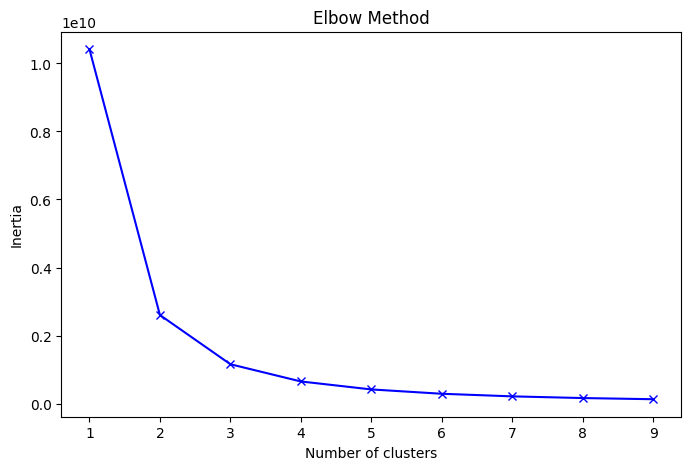

In [90]:
clustering = features.drop('customer_id', axis=1)
inertia = []
K = range(1, 10)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Choose the optimal number of clusters based on the Elbow Method

In [91]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(clustering)

KMeans(n_clusters=3, random_state=42)

### Add cluster labels to original data

In [92]:
df['cluster'] = kmeans.labels_
df.sample(10)

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,gender_name,city_name,merchant_id,merchant_name,cluster
354,355,43,2023-04-17,burned,WLd-742,2023-06-16,3,2021-09-10,12,2,Female,Fayyum,8,Medina-Foster,1
3959,3960,593,2024-01-24,subscribed,qqP-885,NaT,7,2023-08-22,14,2,Female,Damietta,7,Berry-Anderson,0
355,356,944,2024-05-10,burned,Ryu-957,2024-05-20,2,2021-08-13,4,1,Male,Shubra El-Kheima,18,Lewis LLC,1
675,676,134,2024-06-01,subscribed,Ffv-709,NaT,4,2023-08-26,2,2,Female,Alexandria,15,Butler-Gomez,2
160,161,156,2024-06-11,subscribed,IQn-470,NaT,7,2024-05-22,10,2,Female,Asyut,7,Berry-Anderson,2
2339,2340,264,2024-04-07,burned,jYU-949,2024-07-05,9,2023-01-01,3,2,Female,Giza,13,Thomas-Nelson,0
3805,3806,364,2023-09-25,burned,eNW-612,2023-11-01,5,2023-07-12,5,1,Male,Port Said,9,"Campbell, Shaffer and Martinez",1
21,22,35,2024-07-14,subscribed,MGf-702,NaT,8,2024-06-24,4,1,Male,Shubra El-Kheima,20,Griffin-Leblanc,2
396,397,420,2024-07-13,subscribed,dWs-156,NaT,1,2022-09-24,5,2,Female,Port Said,11,"Smith, Lawson and Hernandez",1
1331,1332,813,2024-06-09,subscribed,ZjM-929,NaT,3,2024-06-06,19,1,Male,Qena,8,Medina-Foster,1


## Segment analysis

In [94]:
analysis = df.groupby('cluster').agg({
    'customer_id': 'count',  
    'transaction_status': lambda x: x.mode()[0],  
    'coupon_name': lambda x: x.mode()[0],  
    'branch_id': lambda x: x.mode()[0],   
    'city_id': lambda x: x.mode()[0],  
    'gender_id': lambda x: x.mode()[0],  
    'merchant_id': lambda x: x.mode()[0]  
}).reset_index()

print(analysis)


   cluster  customer_id transaction_status coupon_name  branch_id  city_id  \
0        0         1675         subscribed     ipC-755          1        5   
1        1         1667             burned     RUj-756          1        1   
2        2         1658             burned     AAB-523          9        5   

   gender_id  merchant_id  
0          2           15  
1          1           13  
2          1           13  
